In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
matches = pd.read_csv("matches.csv")
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
deliveries = pd.read_csv("deliveries.csv")
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


We will look at how the batsmen have performed in all the seasons of IPL and try to come up with an in depth analysis of how things have been and how they have changed over the years.

# Frequency of Scores

We will be looking at the general distribution of scores among the batsmen.

In [7]:
batsmen_score = pd.DataFrame(deliveries.groupby(['match_id','batsman']).sum()['batsman_runs'])
batsmen_score.head()

batsman_runs
match_id batsman                  
1        A Choudhary             6
         BCJ Cutting            16
         CH Gayle               32
         DA Warner              14
         DJ Hooda               16

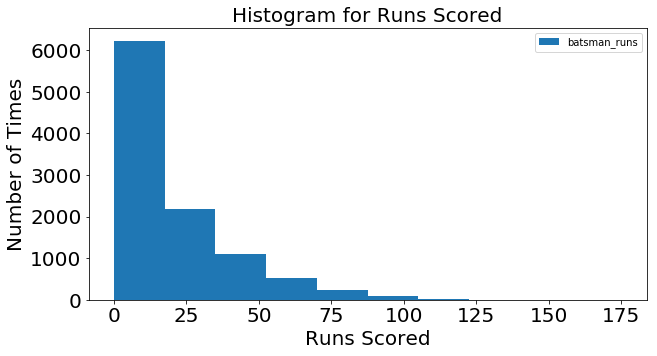

In [41]:
plt.rcParams['figure.figsize'] = 10,5
batsmen_score.plot(kind = 'hist',fontsize = 20)
plt.xlabel('Runs Scored',fontsize = 20)
plt.ylabel('Number of Times',fontsize = 20)
plt.title('Histogram for Runs Scored',fontsize = 20)
plt.show()

This includes time when batsmen might not have played much balls coming towards the end of the innings . Let see for those batsmen who have played atleast 20+ balls

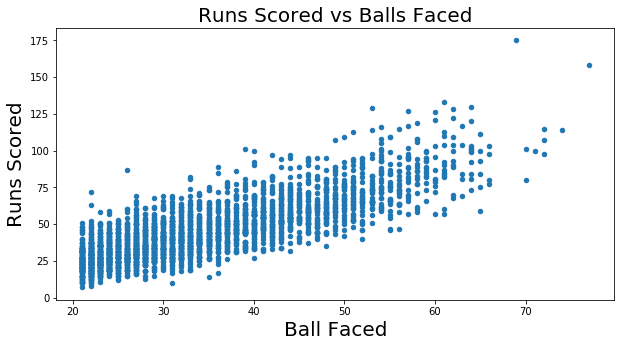

In [63]:
batsmen_score_20 = pd.DataFrame(deliveries.groupby(['match_id','batsman']).agg({'batsman_runs' : 'sum', 'ball' :'count'}))
batsmen_score_20[batsmen_score_20['ball'] > 20].plot(kind = 'scatter', x = 'ball',y = 'batsman_runs')
plt.xlabel('Ball Faced',fontsize = 20)
plt.ylabel('Runs Scored',fontsize = 20)
plt.title('Runs Scored vs Balls Faced',fontsize = 20)
plt.show()

This gives us aan indication that runs scored increases with increase in the ball faced.

Now lets look at how the batsmen have scored runs with respect to their strike rate when they have faced more than 15 balls. Strike rate is defined as the number of runs scored divided by the number of balls faced.

# Strike Rate

In [60]:
batsmen_strikerate = batsmen_score_20[batsmen_score_20['ball'] >= 15]
batsmen_strikerate['Strike Rate'] = batsmen_strikerate['batsman_runs']/batsmen_strikerate['ball']*100
batsmen_strikerate.head()

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


batsman_runs  ball  Strike Rate
match_id batsman                                       
1        CH Gayle                 32    23   139.130435
         KM Jadhav                31    18   172.222222
         MC Henriques             52    37   140.540541
         Mandeep Singh            24    16   150.000000
         S Dhawan                 40    31   129.032258

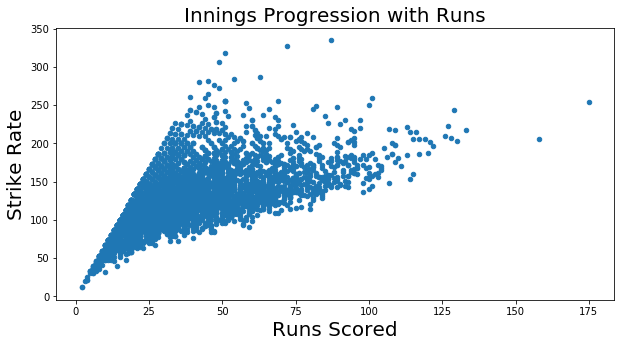

In [100]:
ax = batsmen_strikerate.plot(kind = 'scatter',x = 'batsman_runs', y = 'Strike Rate')
plt.xlabel('Runs Scored',fontsize = 20)
plt.ylabel('Strike Rate',fontsize = 20)
plt.title('Innings Progression with Runs',fontsize = 20)
plt.show()

This appears to be a strange plot, something that i did not expect. It tells us that with increase in the number of runs the strike rate tends to improve. This can be linked to the fact that with increase in the number of balls faced, the scoring increases at a faster rate and hence their ratio tends to increase and so we get such a graph. We all see their are lots of different strike rate particular to a specific score, this can be because of the time the batsmen has come out to play. In the later stage of the innings, they generally come out all guns blazing, their by scoring a quick fire 25~30 runs with a higher strike rate then normal. But we can see that generally when the score is high the lowest limit of the strike rate is increasing and the maximum limit also tend to increase. Lets look at a graph of balls faced vs strike rate.

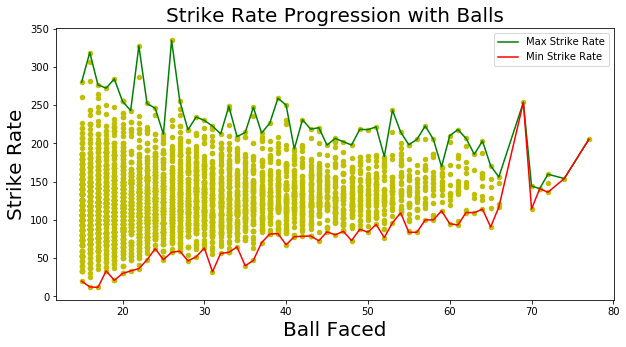

In [116]:
ax = batsmen_strikerate.plot(kind = 'scatter', x ='ball',y = 'Strike Rate',color = 'y')
batsmen_strikerate.groupby(['ball']).max().plot(kind = 'line',y = 'Strike Rate',ax = ax,color = 'green',label = 'Max Strike Rate')
batsmen_strikerate.groupby(['ball']).min().plot(kind = 'line',y = 'Strike Rate',ax = ax,color = 'red',label = 'Min Strike Rate')
plt.xlabel('Ball Faced',fontsize = 20)
plt.ylabel('Strike Rate',fontsize = 20)
plt.title('Strike Rate Progression with Balls',fontsize = 20)
plt.show()

This line graphs gives us a kind of bucket in which we can expect the strikerate to lie when we know the number of balls faced and we can see that we increase in the number of ball faced , the bucket tends to become shorter and shorter.

Since we have looked on the strike rates so much, lets have a look on how the general distribution of strike rate is.

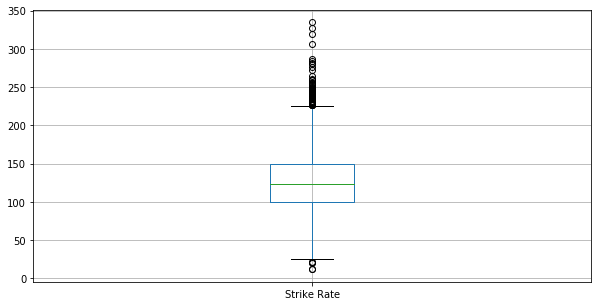

In [115]:
batsmen_strikerate.boxplot(column = ['Strike Rate'])

Lets look at the players who have the best Strike Rate in a game when they faced more than 30 balls

In [132]:
batsmen_strikerate[batsmen_strikerate['ball'] > 30].sort_values(by = 'Strike Rate',ascending = False).head()
#Balls Faced greated than 30

,,batsman_runs,ball,Strike Rate
match_id,batsman,,,
448,DA Miller,101,39,258.974359
411,CH Gayle,175,69,253.623188
176,YK Pathan,100,40,250.000000
599,CH Morris,82,33,248.484848
7898,AD Russell,89,36,247.222222


As we can see most players have balls between 30 and 40. As we know strike rate tends to change with balls faced. Let us increase the balls and see what happens.

In [133]:
batsmen_strikerate[batsmen_strikerate['ball'] > 40].sort_values(by = 'Strike Rate',ascending = False).head()
#Balls Faced greated than 40

,,batsman_runs,ball,Strike Rate
match_id,batsman,,,
411,CH Gayle,175,69,253.623188
620,AB de Villiers,129,53,243.396226
7919,SS Iyer,97,42,230.952381
206,M Vijay,127,57,222.807018
626,V Kohli,113,51,221.568627


As expected it has changed and we can also see the Strike Rate decreasing as we have increase the number of balls.Lets increase it further.

In [135]:
batsmen_strikerate[batsmen_strikerate['ball'] > 50].sort_values(by = 'Strike Rate',ascending = False).head()
#Balls Faced greated than 50

,,batsman_runs,ball,Strike Rate
match_id,batsman,,,
411,CH Gayle,175,69,253.623188
620,AB de Villiers,129,53,243.396226
206,M Vijay,127,57,222.807018
626,V Kohli,113,51,221.568627
562,AB de Villiers,133,61,218.032787


In [136]:
batsmen_strikerate[batsmen_strikerate['ball'] > 60].sort_values(by = 'Strike Rate',ascending = False).head()
#Balls Faced greated than 60

,,batsman_runs,ball,Strike Rate
match_id,batsman,,,
411,CH Gayle,175,69,253.623188
562,AB de Villiers,133,61,218.032787
372,CH Gayle,128,62,206.451613
60,BB McCullum,158,77,205.194805
7935,RR Pant,130,64,203.125000


In [137]:
batsmen_strikerate[batsmen_strikerate['ball'] > 70].sort_values(by = 'Strike Rate',ascending = False).head()
#Balls Faced greated than 70

,,batsman_runs,ball,Strike Rate
match_id,batsman,,,
60,BB McCullum,158,77,205.194805
97,SE Marsh,115,72,159.722222
171,MK Pandey,114,74,154.054054
200,DA Warner,107,72,148.611111
247,SR Tendulkar,100,71,140.845070


Now we can see how the strike rate has changed with change in number of balls and also the players name have changed. Infact is not strange to see that the players who were there is the first list are not there in the last lists.

Lets look the the strike rate of all the players overall in all the seasons.

In [141]:
aggregatedata = pd.merge(matches,deliveries, left_on = 'id',right_on = 'match_id')
aggregatedata.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'match_id', 'inning', 'batting_team', 'bowling_team', 'over',
       'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [202]:
batsmen_strikerate_season = pd.DataFrame(deliveries.groupby(['batsman']).agg({'batsman_runs' : 'sum','ball' : 'count'}))
batsmen_strikerate_season['Strike Rate'] = batsmen_strikerate_season['batsman_runs']/batsmen_strikerate_season['ball']*100
batsmen_strikerate_season = batsmen_strikerate_season.sort_values(by ='Strike Rate' , ascending = False)
batsmen_strikerate_season[batsmen_strikerate_season['batsman_runs'] > 2500] 
# We have taken runs greater then 2500 So that we take a significant amount of runs

,batsman_runs,ball,Strike Rate
batsman,,,
V Sehwag,2728,1833,148.827059
AB de Villiers,3974,2683,148.117779
CH Gayle,4037,2793,144.539921
YK Pathan,3198,2287,139.833843
DA Warner,4014,2902,138.318401
SR Watson,3197,2317,137.980147
SK Raina,5014,3723,134.676336
MS Dhoni,4041,3001,134.655115
RG Sharma,4504,3497,128.796111


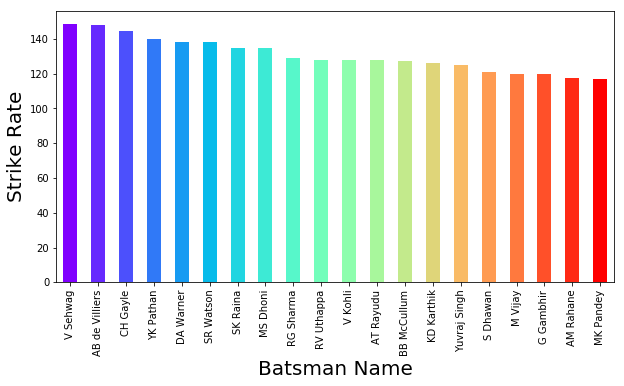

In [162]:
colors = cm.rainbow(np.linspace(0,1,len(batsmen_strikerate_season[batsmen_strikerate_season['batsman_runs'] > 2500])))
batsmen_strikerate_season[batsmen_strikerate_season['batsman_runs'] > 2500].plot(kind = 'bar',y = 'Strike Rate',
                                                                                color = colors,legend = '',fontsize = 10)
plt.xlabel('Batsman Name',fontsize = 20)
plt.ylabel('Strike Rate',fontsize = 20)
plt.show()

We see that players who have scored a significant amount of runs tends to have almost similar strike rates and it does not vary much for batsmen who have played for a long time and have scored many runs. Lets look at the chart of who tops this list every season.

In [203]:
batsmen_strikerate_eseason = pd.DataFrame(aggregatedata.groupby(['season','batsman']).agg({'batsman_runs' : 'sum','ball' : 'count'}))
batsmen_strikerate_eseason['Strike Rate'] = batsmen_strikerate_eseason['batsman_runs']/batsmen_strikerate_eseason['ball']*100
batsmen_strikerate_eseason = batsmen_strikerate_eseason.sort_values(by =['season','Strike Rate'] , ascending = False)
batsmen_strikerate_eseason.reset_index(inplace = True)
batsmen_strikerate_eseason[batsmen_strikerate_eseason['batsman_runs'] > 300]

# We have taken runs greater then 300 So that we take a significant amount of runs

,season,batsman,batsman_runs,ball,Strike Rate
5,2018,SP Narine,373,198,188.383838
6,2018,AD Russell,326,179,182.122905
10,2018,RR Pant,717,412,174.029126
11,2018,AB de Villiers,488,281,173.665480
17,2018,KL Rahul,678,426,159.154930
18,2018,JC Buttler,574,365,157.260274
21,2018,SR Watson,569,368,154.619565
27,2018,AT Rayudu,615,410,150.000000
30,2018,MS Dhoni,481,321,149.844237
31,2018,KD Karthik,520,349,148.997135


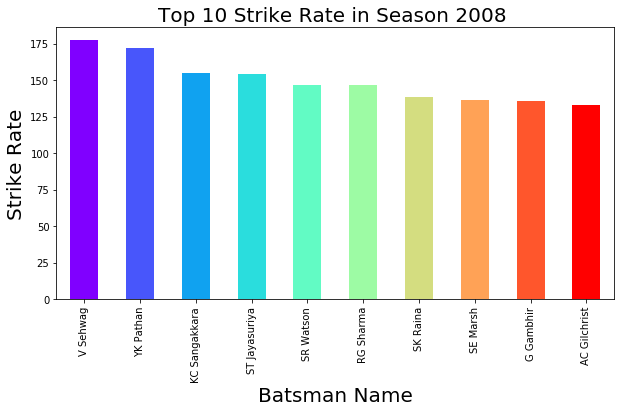

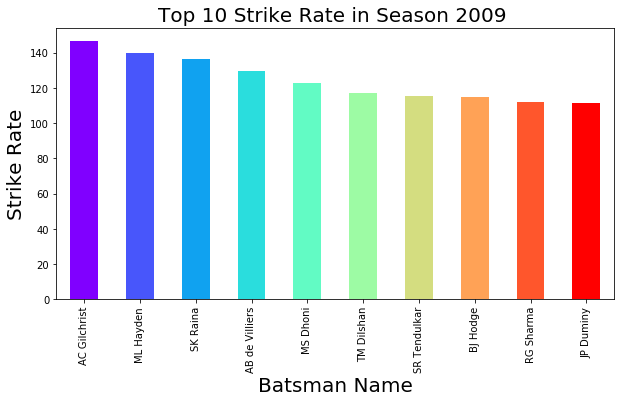

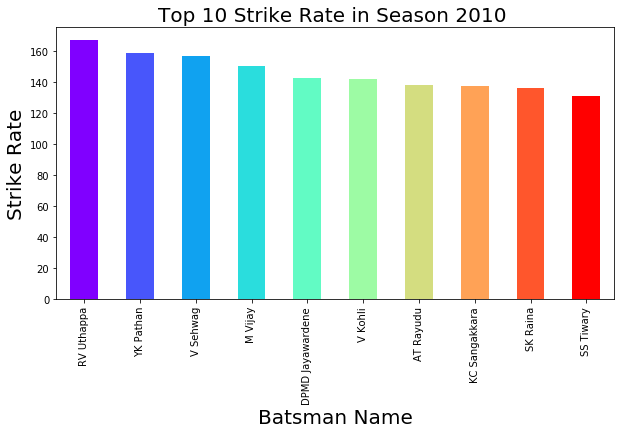

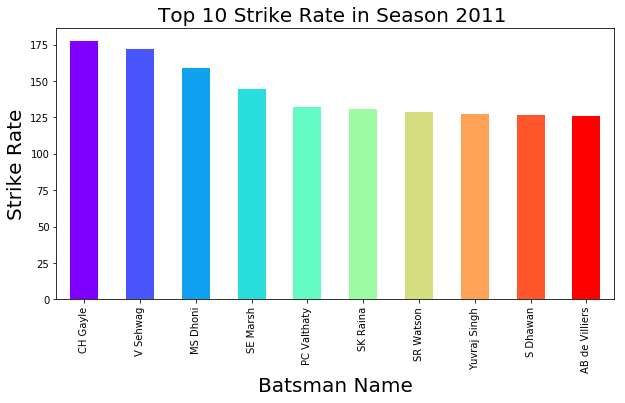

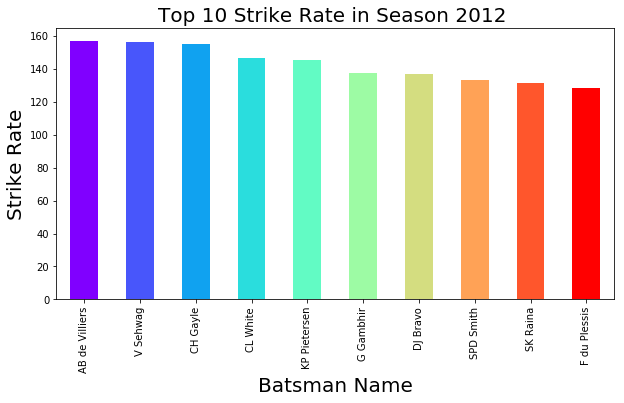

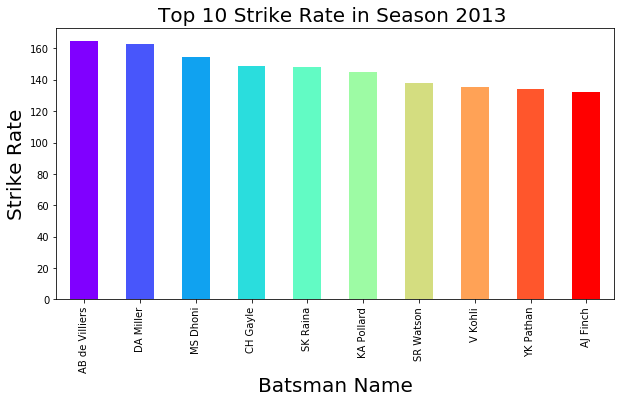

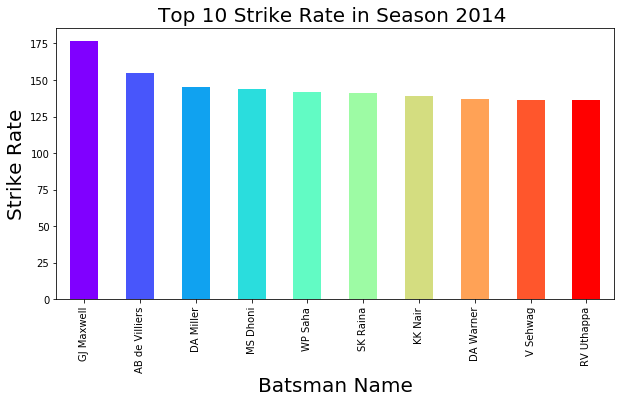

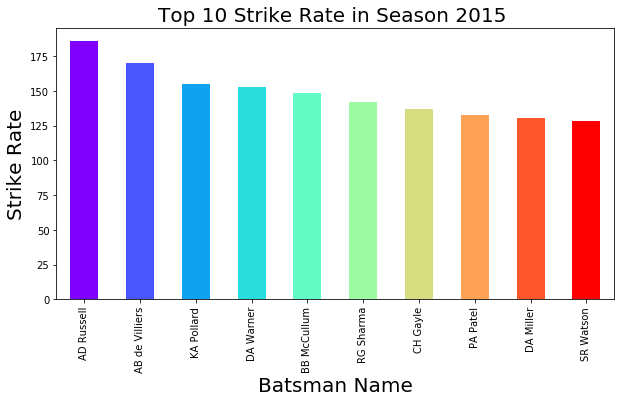

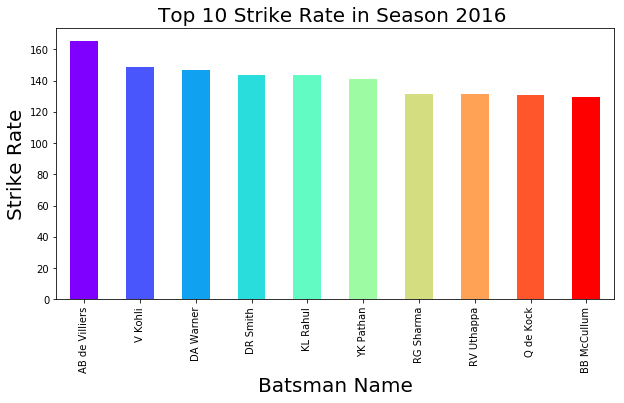

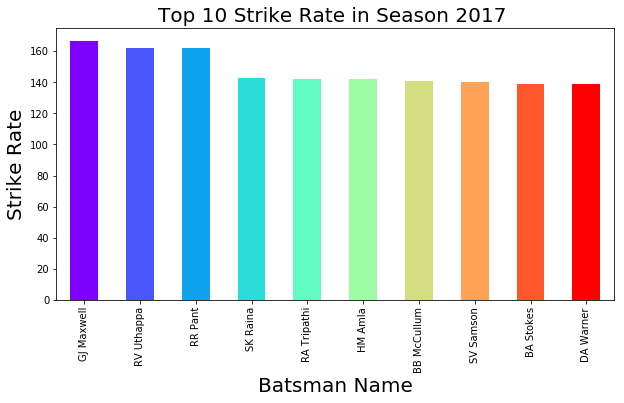

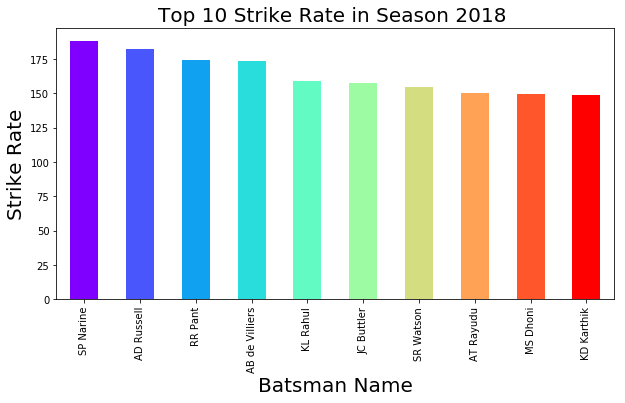

In [190]:
colors = cm.rainbow(np.linspace(0,1,10))
plt.rcParams['figure.figsize'] = 10,5
for title,group in batsmen_strikerate_eseason.groupby('season'):
    group[group['batsman_runs'] > 300].head(10).plot(x = 'batsman',y = 'Strike Rate',kind = 'bar',legend = '',
                                                     color = colors,fontsize = 10)
    plt.xlabel('Batsman Name',fontsize = 20)
    plt.ylabel('Strike Rate',fontsize = 20)
    plt.title('Top 10 Strike Rate in Season %s '%title,fontsize = 20)
plt.show()

# Average 

This is the average number of runs scored by the batsman in each match.

In [197]:
batsmen_average = pd.DataFrame(deliveries.groupby(['batsman']).agg({'batsman_runs' : 'sum','player_dismissed' : 'count'}))
batsmen_average['Average'] = batsmen_average['batsman_runs']/batsmen_average['player_dismissed']
batsmen_average = batsmen_average.sort_values(by = 'Average',ascending = False)
batsmen_average[batsmen_average['batsman_runs'] > 2500]

,batsman_runs,player_dismissed,Average
batsman,,,
AB de Villiers,3974,94,42.276596
CH Gayle,4037,98,41.193878
DA Warner,4014,102,39.352941
MS Dhoni,4041,112,36.080357
V Kohli,4962,138,35.956522
SK Raina,5014,145,34.579310
S Dhawan,4090,122,33.524590
AM Rahane,3445,104,33.125000
SR Watson,3197,98,32.622449


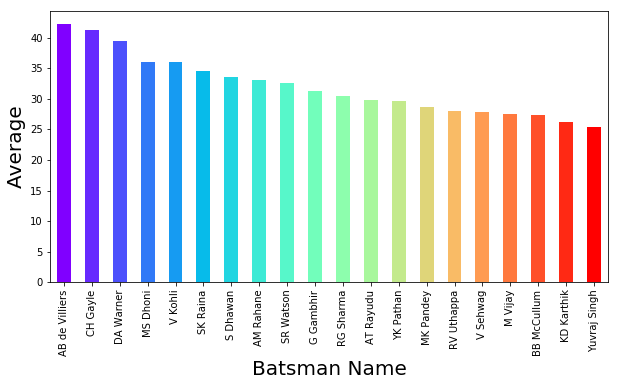

In [198]:
colors = cm.rainbow(np.linspace(0,1,len(batsmen_average[batsmen_average['batsman_runs'] > 2500])))
batsmen_average[batsmen_average['batsman_runs'] > 2500].plot(kind = 'bar',y = 'Average',
                                                                                color = colors,legend = '',fontsize = 10)
plt.xlabel('Batsman Name',fontsize = 20)
plt.ylabel('Average',fontsize = 20)
plt.show()

We can see that average tend have a higher decrease from the first to the end then what we saw for strike rate.Now a interesting thing to see will be the relation between Average and strike rate for a player.

In [276]:
batsmen_averagesr = pd.merge(batsmen_strikerate_season,batsmen_average,left_on = 'batsman',right_on = 'batsman')
batsmen_averagesr.reset_index(inplace = True)
batsmen_averagesr['Category'] = batsmen_averagesr['batsman_runs_x'].apply(lambda x: 1 if x <= 250 
                                                                         else( 2 if x<=500 
                                                                         else( 3 if x<=1000  
                                                                         else( 4 if x<=1500
                                                                         else( 5 if x<=2000
                                                                         else( 6 if x<=2500 
                                                                         else 7))))))
#batsmen_averagesr['Category'] = batsmen_averagesr['batsman_runs_x'].apply(lambda x: 3 if x >= 1000 else batsmen_averagesr['Category'])
#batsmen_averagesr['Category'] = batsmen_averagesr['batsman_runs_x'].apply(lambda x: 4 if x >= 2000 else batsmen_averagesr['Category'])
#batsmen_averagesr['Category'] = batsmen_averagesr['batsman_runs_x'].apply(lambda x: 5 if x >= 3000 else batsmen_averagesr['Category'])
#batsmen_averagesr['Category'] = batsmen_averagesr['batsman_runs_x'].apply(lambda x: 6 if x >= 4000 else batsmen_averagesr['Category'])
#batsmen_averagesr['Category'] = batsmen_averagesr['batsman_runs_x'].apply(lambda x: 7 if x >= 5000 else batsmen_averagesr['Category'])
batsmen_averagesr['Category'].unique()



array([1, 3, 4, 2, 7, 6, 5])

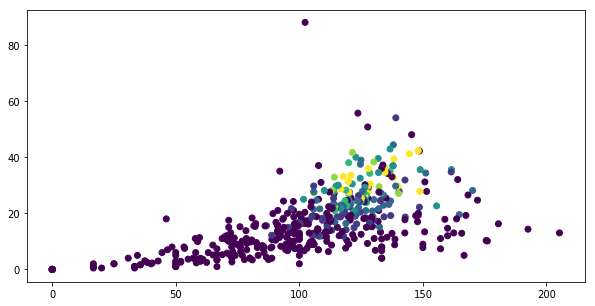

In [278]:
fig, ax = plt.subplots()
categories = np.unique(batsmen_averagesr['Category'])
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors))  

batsmen_averagesr["Color"] = batsmen_averagesr['Category'].apply(lambda x: colordict[x])
ax.scatter(batsmen_averagesr['Strike Rate'],batsmen_averagesr['Average'],c =batsmen_averagesr['Color'],label =batsmen_averagesr['Category'])